In [23]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import tensorflow as tf
import math

### $L^2$ Norm
#### It is the square root of the summation of suares of all the elements. This norm also gives us the value of the Euclidean distance of a point from the origin.

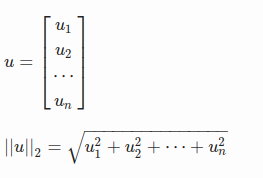

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Image Source: https://towardsdatascience.com/

The L² norm is often referred to as the Euclidean Distance, the Mean Squared Error (MSE) / Least Squares Error, or the Ridge Operator.

In [2]:
x = np.array([25, 2, 5]) # type argument is optional, e.g.: dtype=np.float16
x

array([25,  2,  5])

In [3]:
l2_norm = (25**2 + 2**2 + 5**2)**(1/2)
l2_norm

25.573423705088842

In [4]:
np.linalg.norm(x) # direct formula

25.573423705088842

So, if units in this 3-dimensional vector space are meters, then the vector $x$ has a length of 25.6m

### $L^1$ Norm

#### It is the summation of absolute/modulus values of all the elements.

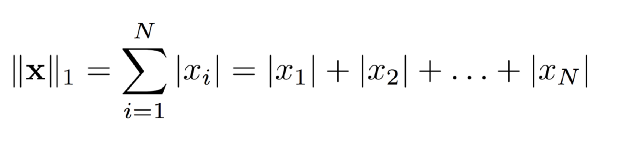

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Image Source: https://towardsdatascience.com/

The L¹ norm is often referred to as the Manhattan/Taxicab Distance, the Mean Absolute Error (MAE), or the Least Absolute Shrinkage and Selection Operator (LASSO).

In [5]:
l1_norm = np.abs(25) + np.abs(2) + np.abs(5)
l1_norm

32

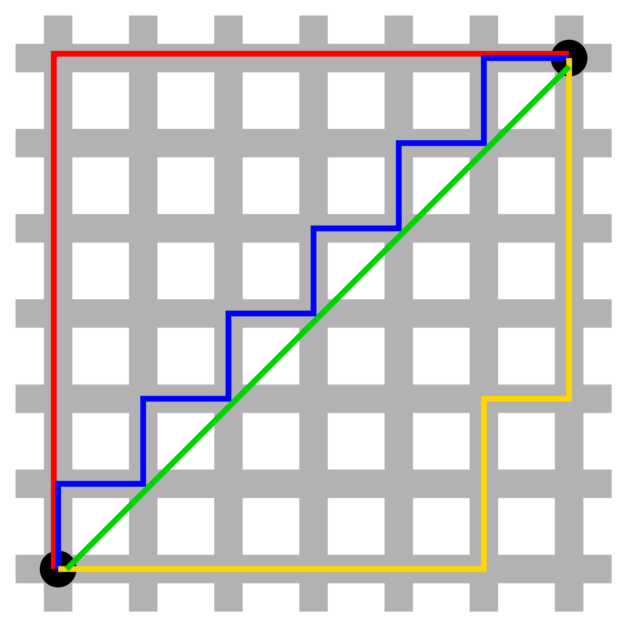

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Image Source: https://towardsdatascience.com/

The red, blue, and yellow distances all compute the L¹ distance, while the green distance computes the L² distance. One reason the L¹ norm is described as the taxicab distance is because it describes the number of blocks you have to travel to reach your destination.

### Squared $L^2$ Norm

#### It is the summation of squares of all the elements. It can also be found by using dot product of a tensor with itself. As the name suggests, it is the square of the L2 norm.

In [6]:
(25**2 + 2**2 + 5**2)

654

In [7]:
np.dot(x, x)

654

### Max Norm

#### It is the maximum absolute value of the all the elements of the tensor.

In [8]:
np.max([np.abs(25), np.abs(2), np.abs(5)])

25

### Unit Vectors

#### A special type of vector, whose $L^2$ Norm is 1 or whose distance from the origin is 1. Any tensor of the type ([CosA, SinA]) is a unit vector.
#### This is because $Cos^2A$ + $Sin^2A$ is always equal to 1 and Sqrt(1) will give us 1.

In [9]:
j = 2 ** 0.5 
y = np.array([1/j,1/j])
y 

array([0.70710678, 0.70710678])

In [11]:
round(np.linalg.norm(y))

1

#### y is a special case where A = 45 degrees,both SinA and CosA are equal at 45 degrees. y is a unit vector.

### Basis Vectors

#### Vectors that can be scaled to represent any other vector in  a given vector space. Typically the unit vectors along the given axes are chosen to be the basis vector (For eg. ([[ 1, 0 ], [ 0, 1 ]] in 2d space and [[ 1 ,0, 0 ], [ 0 ,1 , 0], [ 0 , 0, 1 ]] in 3d space.)

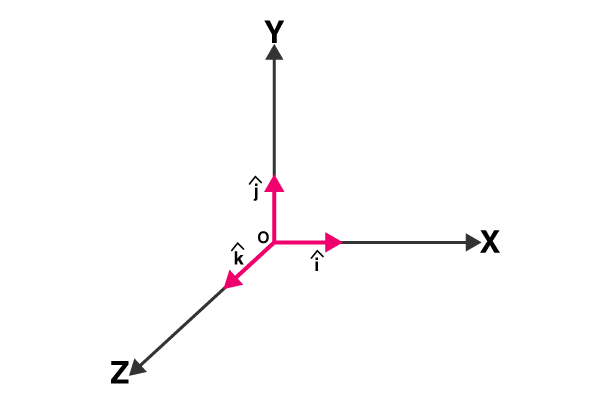

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Image Source: Google

### Orthogonal Vectors
#### x and y are orthogonal if $x^Ty$ is 0. These vectors are perpendicular (at 90 degrees) to each other. An n dimensional space has a maximum of n orthogonal vectors. Eg. In a 2d space a vector can have at most 2 orthogonal vectors to it. Two vectors are orthogonal if their dot product is 0 and vice-versa is also true, if two vectors are orthogonal their dot product is 0.

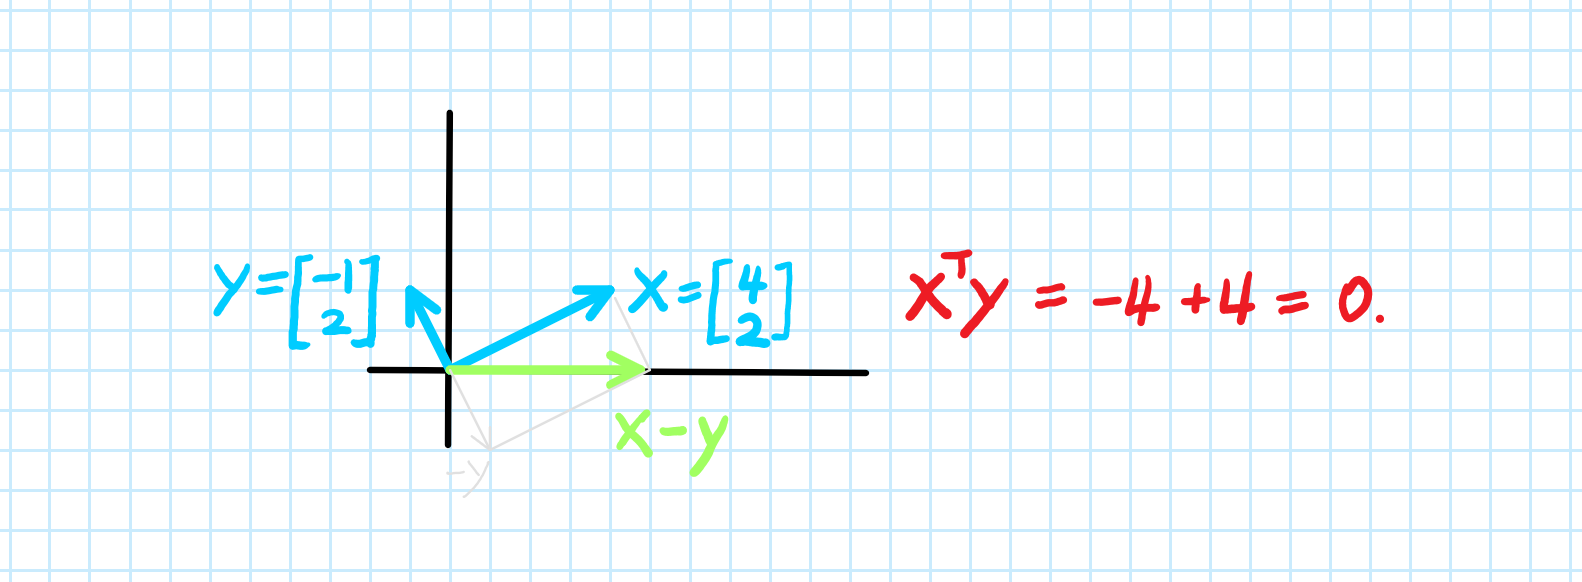
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Image Source: Google

In [12]:
x = np.array([[4, 2]])
x

array([[4, 2]])

In [13]:
y = np.array([[-1, 2]])
y

array([[-1,  2]])

In [16]:
np.dot(x, y.T) 

array([[0]])

Since their dot producut is 0, the angle between them should be 90 degrees.

In [21]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return math.degrees(np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0)))

In [24]:
angle_between(x, y.T)

90.0

Thus the angle between them is 90 degrees

### Orthonormal Vectors

#### These are orthogonal to each other and have unit length.

In [12]:
i = np.array([1, 0])
i

array([1, 0])

In [13]:
j = np.array([0, 1])
j

array([0, 1])

In [14]:
np.dot(i, j) 

0

#### i and j are Orthonormal vectors.

#### Property of Orthonormal Vectors

Assuming vectors q1, q2, q3, ……., qn are orthonormal vectors. Then
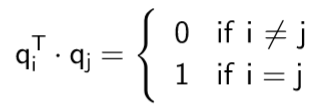

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Image Source:https://medium.com/